# us cases to us state cases

## initialize

### import packages

In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

### collect relevant datasets

In [2]:
# Select Date Range, Store as DataFrame of Strings
# We use this to select all the relevant files, organized by date

start_date = datetime.date(2021,1,1)
end_date = datetime.date(2021,4,14)

dates = pd.date_range(start_date,end_date-datetime.timedelta(days=1),freq='d')
dates_str = dates.strftime("%m-%d-%Y")

In [3]:
# Collect list of files for all the selected dates

file_list = [ ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
            + date
            + '.csv') for date in dates_str ]

In [4]:
%%time

# List of DataFrames - each one covers one day of global data
df_list = [ pd.read_csv(file) for file in file_list ]

Wall time: 50.4 s


In [5]:
# DataFrame that contains all the files' data 

super_cases = pd.concat(df_list)

In [6]:
super_cases

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,51526,2191,41727.0,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634.0,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395.0,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463.0,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146.0,6017.0,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,NaN,NaN,NaN,Vietnam,2021-04-14 04:20:41,14.058324,108.277199,2714,35,2445.0,234.0,Vietnam,2.788206,1.289609
3979,NaN,NaN,NaN,West Bank and Gaza,2021-04-14 04:20:41,31.952200,35.233200,272767,2901,237046.0,32820.0,West Bank and Gaza,5346.888001,1.063545
3980,NaN,NaN,NaN,Yemen,2021-04-14 04:20:41,15.552727,48.516388,5507,1073,2070.0,2364.0,Yemen,18.463776,19.484293
3981,NaN,NaN,NaN,Zambia,2021-04-14 04:20:41,-13.133897,27.849332,90218,1229,88144.0,845.0,Zambia,490.743124,1.362256


In [7]:
# Data from only US counties (counties stored in Admin2)

US_cases = super_cases[super_cases['Country_Region'] == 'US']
US_cases

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
649,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0.0,4189.0,"Autauga, Alabama, US",7587.391935,1.179523
650,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0.0,13654.0,"Baldwin, Alabama, US",6192.157109,1.2226
651,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0.0,1484.0,"Barbour, Alabama, US",6145.183505,2.175346
652,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0.0,1808.0,"Bibb, Alabama, US",8279.003304,2.481122
653,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0.0,4630.0,"Blount, Alabama, US",8115.726490,1.342425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,56039.0,Teton,Wyoming,US,2021-04-14 04:20:41,43.935225,-110.589080,3675,9,NaN,NaN,"Teton, Wyoming, US",15662.291169,0.244898
3925,56041.0,Uinta,Wyoming,US,2021-04-14 04:20:41,41.287818,-110.547578,2153,12,NaN,NaN,"Uinta, Wyoming, US",10644.714724,0.557362
3926,90056.0,Unassigned,Wyoming,US,2021-04-14 04:20:41,NaN,NaN,0,0,NaN,NaN,"Unassigned, Wyoming, US",NaN,NaN
3927,56043.0,Washakie,Wyoming,US,2021-04-14 04:20:41,43.904516,-107.680187,898,26,NaN,NaN,"Washakie, Wyoming, US",11505.445227,2.895323


In [8]:
# Latest Date for first cell's Last Update
US_cases.iloc[0].loc['Last_Update']

'2021-01-02 05:22:33'

# global vaccination to us vaccination

## initialize

In [9]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [10]:
# Global Cases
vax_GLO = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv')
vax_GLO

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-02-22,0.0,0.0,0.0,2021/02/22,4.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0,2021/02/23,4.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0,2021/02/24,4.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0,2021/02/25,4.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0,2021/02/26,4.0
...,...,...,...,...,...,...,...
15623,Zimbabwe,2021-04-25,390018.0,336600.0,53418.0,2021/04/25,716.0
15624,Zimbabwe,2021-04-26,411610.0,353834.0,57776.0,2021/04/26,716.0
15625,Zimbabwe,2021-04-27,433939.0,370676.0,63263.0,2021/04/27,716.0
15626,Zimbabwe,2021-04-28,458013.0,388021.0,69992.0,2021/04/28,716.0


In [11]:
# US daily vaccination data from Global dataset
vax_GLO_USA = vax_GLO[vax_GLO.loc[:, 'Country_Region']=='United States']
vax_GLO_USA.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
14957,United States,2020-12-20,556208.0,556208.0,0.0,2020/12/20,840.0
14958,United States,2020-12-21,614117.0,614117.0,0.0,2020/12/21,840.0
14959,United States,2020-12-22,614117.0,614117.0,0.0,2020/12/22,840.0
14960,United States,2020-12-23,1008025.0,1008025.0,0.0,2020/12/23,840.0
14961,United States,2020-12-24,1008025.0,1008025.0,0.0,2020/12/24,840.0


In [12]:
# Storing Dates as DateTime
vax_GLO_USA.loc[:, 'DateTime'] = pd.to_datetime(vax_GLO_USA.loc[:, 'Date'], format='%Y-%m-%d')
vax_GLO_USA.loc[:, 'DateTime']

C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


14957   2020-12-20
14958   2020-12-21
14959   2020-12-22
14960   2020-12-23
14961   2020-12-24
           ...    
15084   2021-04-26
15085   2021-04-27
15086   2021-04-28
15087   2021-04-29
15088   2021-04-30
Name: DateTime, Length: 132, dtype: datetime64[ns]

Text(0.5, 1.0, 'Total Vaccinations Administered over Time (United States)')

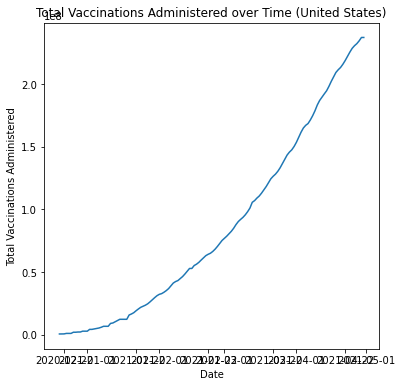

In [13]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_GLO_USA.loc[:, 'DateTime'], vax_GLO_USA.loc[:, 'Doses_admin'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States)')

# us cases to us state cases

In [14]:
# Only USA data for All types of vaccines
import pandas as pd
vax_USA = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/vaccine_data_us_timeline.csv')
vax_USA_All = vax_USA[vax_USA.loc[:, 'Vaccine_Type'] == 'All']
#vax_USA_All
vax_USA['Vaccine_Type'].unique()

array(['All', 'Moderna', 'Pfizer', 'Unassigned', 'Unknown'], dtype=object)

In [15]:
# Adding column for dates as DateTime

vax_USA_All.loc[:, 'DateTime'] = pd.to_datetime(vax_USA_All.loc[:, 'Date'], format='%Y-%m-%d')

C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [16]:
# Cumulative efficiency = (Total doses administered so far)/(Total doses shipped so far)

vax_USA_All.loc[:, 'Cumulative_efficiency'] = vax_USA_All.loc[:, 'Doses_admin'] / vax_USA_All.loc[:, 'Doses_shipped']

In [17]:
vax_USA_All

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key,DateTime,Cumulative_efficiency
0,Alabama,2020-12-10,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-10,NaN
3,Alabama,2020-12-11,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-11,NaN
6,Alabama,2020-12-12,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-12,NaN
9,Alabama,2020-12-13,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-13,NaN
12,Alabama,2020-12-14,All,1.0,US,32.3182,-86.9023,40950.0,NaN,NaN,NaN,NaN,"Alabama, US",2020-12-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31186,Department of Defense,2021-04-30,All,NaN,US,NaN,NaN,NaN,3711500.0,2854656.0,1762263.0,1015224.0,"Department of Defense, US",2021-04-30,0.769138
31191,Federal Bureau of Prisons,2021-04-30,All,NaN,US,NaN,NaN,NaN,158890.0,148122.0,84258.0,63148.0,"Federal Bureau of Prisons, US",2021-04-30,0.932230
31196,Indian Health Services,2021-04-30,All,NaN,US,NaN,NaN,NaN,1683415.0,1237506.0,712421.0,517592.0,"Indian Health Services, US",2021-04-30,0.735116
31201,Long Term Care (LTC) Program,2021-04-30,All,NaN,US,NaN,NaN,NaN,NaN,7795261.0,NaN,NaN,"Long Term Care (LTC) Program, US",2021-04-30,NaN


# political correlation?

In [18]:
us_political = pd.read_csv('1976-2020-president.tab', sep='\t')

In [19]:
us_political

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN \\""BEN\""\""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


In [31]:
us_pol_1 = us_political.drop_duplicates(subset=['year','state'], keep=us_political.max('candidatevotes')).reset_index(drop=True)

ValueError: No axis named candidatevotes for object type DataFrame

In [ ]:
us_pol_1

In [ ]:
us_pol_3 = us_political.copy()
us_pol_3 = us_pol_3.drop(us_pol_3[us_pol_3['year'] < 2004].index)
us_pol_3


In [ ]:
us_political

In [ ]:
us_pol_4 = us_pol_3.groupby(['state', 'year'], group_keys=False).apply(lambda x: x.loc[x.candidatevotes.idxmax()])

In [ ]:
us_pol_2 = us_political.groupby(['state', 'year'], group_keys=False).apply(lambda x: x.loc[x.candidatevotes.idxmax()])

In [ ]:
us_pol_2

In [ ]:
us_pol_2.loc[us_pol_2['state'] == 'ALABAMA']

In [ ]:
states = []
for index, row in us_political.iterrows():
    states.append(row['state'])

In [ ]:
states = list(set(states))

In [ ]:
states.sort()
states

In [ ]:
# for i in states:
#     temp = us_pol_2.loc[us_pol_2['state'] == i]
temp = us_pol_2.loc[us_pol_2['state'] == 'ALABAMA']
ALlist = temp['party_simplified'].value_counts().to_dict()
temp2 = us_pol_2.loc[us_pol_2['state'] == 'CALIFORNIA']
CAlist = temp2['party_simplified'].value_counts().to_dict()

In [ ]:
ALlist

In [ ]:
CAlist

In [ ]:
temp2['party_simplified'].value_counts()

In [ ]:
states_pol = {}
for i in states: 
    temp = us_pol_2.loc[us_pol_2['state'] == i]
    dictionary = temp['party_simplified'].value_counts().to_dict()
    states_pol[i] = max(dictionary)

In [ ]:
states_pol

In [ ]:
states_pol = {}
for i in states: 
    temp = us_pol_4.loc[us_pol_2['state'] == i]
    dictionary = temp['party_simplified'].value_counts().to_dict()
    states_pol[i] = max(dictionary)

In [ ]:
count= [0,0]
for party in states_pol.values():
    if party == 'REPUBLICAN':
        count[0] += 1
    if party == 'DEMOCRAT':
        count[1] += 1
count #[REP, DEM]

In [ ]:
vax_USA_All_2 = vax_USA_All.copy()
#vax_USA_All_2.loc[:, 'Political'] = states_pol[vax_USA_All_2['Province_State']]
states_index = vax_USA_All_2['Province_State'].tolist()
for index, row in vax_USA_All_2.iterrows():
    try:
        vax_USA_All_2.loc[index, 'Political'] = states_pol[row['Province_State'].upper()]
    
    except KeyError:
        vax_USA_All_2.loc[index, 'Political'] = 'NaN'

# for i in states_index:
#     try:
#         vax_USA_All_2['Political'] = states_pol[i.upper()]
        
#     except KeyError:
#         vax_USA_All_2['Political'] = 'NaN'
    

In [ ]:
vax_USA_All_3 = vax_USA_All_2.copy()
vax_USA_All_3 = vax_USA_All_3.drop(vax_USA_All_3[vax_USA_All_3['Political'] == 'NaN'].index)
# vax_USA_All_3_group = vax_USA_All_3.groupby('Political', group_keys = False)
# vax_USA_All_3_group.head()

# I think a column needs to be created to normalize the number (more republican states than democratic)
### NORMALIZE BY POPULATION! ####
# lambda x: x = np.sum/rep_states['Province_State'].nunique()?
#creating a republican group
rep_states = vax_USA_All_3.copy()
rep_states = rep_states.loc[rep_states[rep_states['Political'] == 'REPUBLICAN'].index]
rep_states_grouped = rep_states.copy()
rep_states_grouped = rep_states_grouped.groupby('DateTime').agg({'Doses_admin':np.average, 'DateTime':'first'})

#creating a democratic group
dem_states = vax_USA_All_3.copy()
dem_states = dem_states.loc[dem_states[dem_states['Political'] == 'DEMOCRAT'].index]
dem_states_grouped = dem_states.copy()
dem_states_grouped = dem_states_grouped.groupby('DateTime').agg({'Doses_admin':np.average, 'DateTime':'first'})

rep_states_grouped

In [ ]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = rep_states_grouped.loc[:,'DateTime']
y1 = rep_states_grouped.loc[:, 'Doses_admin']
x2 = dem_states_grouped.loc[:,'DateTime']
y2 = dem_states_grouped.loc[:, 'Doses_admin']
plt.plot(x1,y1, c='r')
plt.plot(x2,y2, c='b')
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States)')

# comparing America to other countries

In [36]:
vax_GLO

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,Afghanistan,2021-02-22,0.0,0.0,0.0,2021/02/22,4.0
1,Afghanistan,2021-02-23,0.0,0.0,0.0,2021/02/23,4.0
2,Afghanistan,2021-02-24,0.0,0.0,0.0,2021/02/24,4.0
3,Afghanistan,2021-02-25,0.0,0.0,0.0,2021/02/25,4.0
4,Afghanistan,2021-02-26,0.0,0.0,0.0,2021/02/26,4.0
...,...,...,...,...,...,...,...
15623,Zimbabwe,2021-04-25,390018.0,336600.0,53418.0,2021/04/25,716.0
15624,Zimbabwe,2021-04-26,411610.0,353834.0,57776.0,2021/04/26,716.0
15625,Zimbabwe,2021-04-27,433939.0,370676.0,63263.0,2021/04/27,716.0
15626,Zimbabwe,2021-04-28,458013.0,388021.0,69992.0,2021/04/28,716.0


In [37]:
vax_GLO['Country_Region'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Gr

In [38]:
# England daily vaccination data from Global dataset
vax_GLO_ENG = vax_GLO[vax_GLO.loc[:, 'Country_Region']=='England']
vax_GLO_ENG.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
4164,England,2021-01-03,1193335.0,1172675.0,20660.0,2021/01/03,82601.0
4165,England,2021-01-04,1193335.0,1172675.0,20660.0,2021/01/04,82601.0
4166,England,2021-01-05,1193335.0,1172675.0,20660.0,2021/01/05,82601.0
4167,England,2021-01-06,1193335.0,1172675.0,20660.0,2021/01/06,82601.0
4168,England,2021-01-07,1193335.0,1172675.0,20660.0,2021/01/07,82601.0


In [40]:
# Storing Dates as DateTime
vax_GLO_ENG.loc[:, 'DateTime'] = pd.to_datetime(vax_GLO_ENG.loc[:, 'Date'], format='%Y-%m-%d')
vax_GLO_ENG.loc[:, 'DateTime']
vax_GLO_ENG.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,DateTime
4164,England,2021-01-03,1193335.0,1172675.0,20660.0,2021/01/03,82601.0,2021-01-03
4165,England,2021-01-04,1193335.0,1172675.0,20660.0,2021/01/04,82601.0,2021-01-04
4166,England,2021-01-05,1193335.0,1172675.0,20660.0,2021/01/05,82601.0,2021-01-05
4167,England,2021-01-06,1193335.0,1172675.0,20660.0,2021/01/06,82601.0,2021-01-06
4168,England,2021-01-07,1193335.0,1172675.0,20660.0,2021/01/07,82601.0,2021-01-07


Text(0.5, 1.0, 'Total Vaccinations Administered over Time (England)')

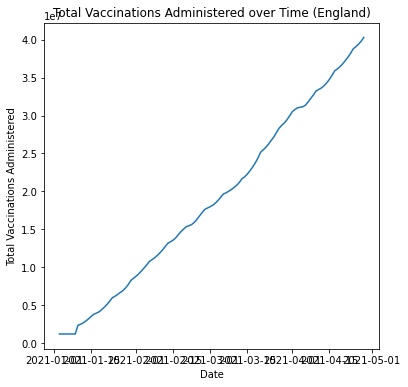

In [41]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_GLO_ENG.loc[:, 'DateTime'], vax_GLO_ENG.loc[:, 'Doses_admin'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (England)')

Text(0.5, 1.0, 'Total Vaccinations Administered over Time (United States v England)')

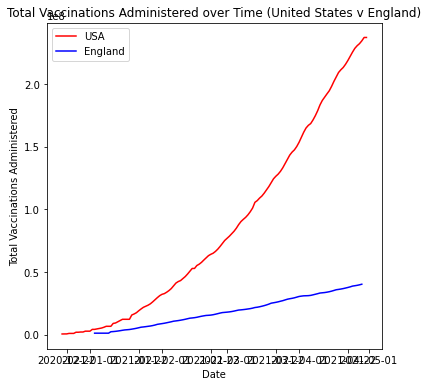

In [46]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_GLO_USA.loc[:, 'DateTime']
y1 = vax_GLO_USA.loc[:, 'Doses_admin']
x2 = vax_GLO_ENG.loc[:, 'DateTime']
y2 = vax_GLO_ENG.loc[:, 'Doses_admin']

plt.plot(x1,y1, c='r', label = 'USA')
plt.plot(x2,y2, c='b', label='England')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States v England)')


Text(0.5, 1.0, 'People Fully Vaccinated over Time (United States v England)')

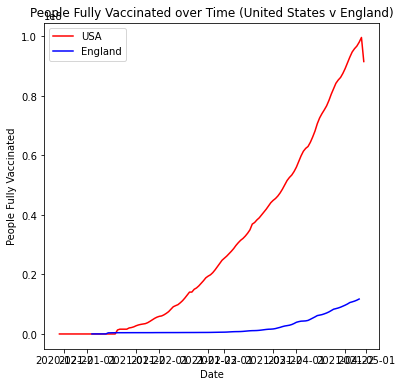

In [47]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_GLO_USA.loc[:, 'DateTime']
y1 = vax_GLO_USA.loc[:, 'People_fully_vaccinated']
x2 = vax_GLO_ENG.loc[:, 'DateTime']
y2 = vax_GLO_ENG.loc[:, 'People_fully_vaccinated']

plt.plot(x1,y1, c='r', label='USA')
plt.plot(x2,y2, c='b', label='England')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (United States v England)')


C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Text(0.5, 1.0, 'Total Vaccinations Administered over Time (England)')

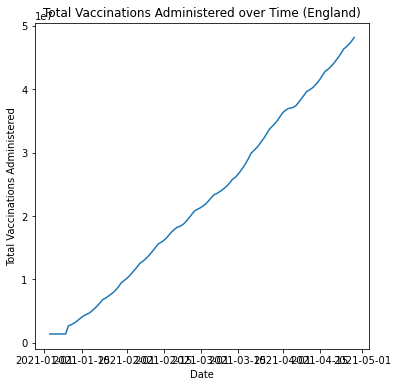

In [75]:
# England daily vaccination data from Global dataset
vax_GLO_UK = vax_GLO[vax_GLO.loc[:, 'Country_Region']=='United Kingdom']

# Storing Dates as DateTime
vax_GLO_UK.loc[:, 'DateTime'] = pd.to_datetime(vax_GLO_UK.loc[:, 'Date'], format='%Y-%m-%d')
vax_GLO_UK.loc[:, 'DateTime']

# US Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_GLO_UK.loc[:, 'DateTime'], vax_GLO_UK.loc[:, 'Doses_admin'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (England)')

Text(0.5, 1.0, 'Total Vaccinations Administered over Time (United States v United Kingdom)')

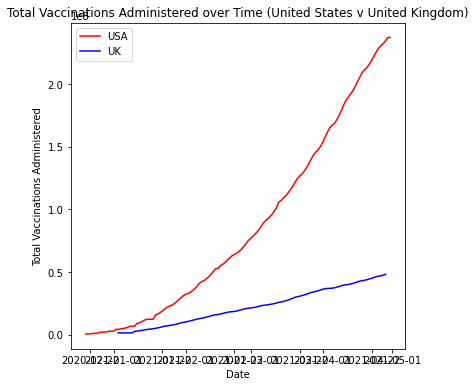

In [76]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_GLO_USA.loc[:, 'DateTime']
y1 = vax_GLO_USA.loc[:, 'Doses_admin']
x2 = vax_GLO_UK.loc[:, 'DateTime']
y2 = vax_GLO_UK.loc[:, 'Doses_admin']

plt.plot(x1,y1, c='r', label = 'USA')
plt.plot(x2,y2, c='b', label='UK')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States v United Kingdom)')

Text(0.5, 1.0, 'People Fully Vaccinated over Time (United States v UK)')

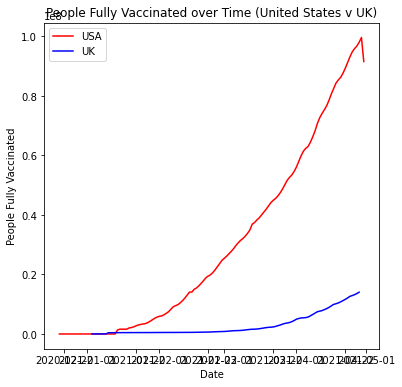

In [77]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_GLO_USA.loc[:, 'DateTime']
y1 = vax_GLO_USA.loc[:, 'People_fully_vaccinated']
x2 = vax_GLO_UK.loc[:, 'DateTime']
y2 = vax_GLO_UK.loc[:, 'People_fully_vaccinated']

plt.plot(x1,y1, c='r', label='USA')
plt.plot(x2,y2, c='b', label='UK')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (United States v UK)')

In [48]:
# England daily vaccination data from Global dataset
vax_GLO_ISR = vax_GLO[vax_GLO.loc[:, 'Country_Region']=='Israel']
vax_GLO_ISR.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
7043,Israel,2020-12-19,61.0,61.0,0.0,2020/12/19,376.0
7044,Israel,2020-12-20,7436.0,7436.0,0.0,2020/12/20,376.0
7045,Israel,2020-12-21,32318.0,32318.0,0.0,2020/12/21,376.0
7046,Israel,2020-12-22,76939.0,76939.0,0.0,2020/12/22,376.0
7047,Israel,2020-12-23,139777.0,139777.0,0.0,2020/12/23,376.0


In [49]:
# Storing Dates as DateTime
vax_GLO_ISR.loc[:, 'DateTime'] = pd.to_datetime(vax_GLO_ISR.loc[:, 'Date'], format='%Y-%m-%d')
vax_GLO_ISR.loc[:, 'DateTime']
vax_GLO_ISR.head()

C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\amand\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,DateTime
7043,Israel,2020-12-19,61.0,61.0,0.0,2020/12/19,376.0,2020-12-19
7044,Israel,2020-12-20,7436.0,7436.0,0.0,2020/12/20,376.0,2020-12-20
7045,Israel,2020-12-21,32318.0,32318.0,0.0,2020/12/21,376.0,2020-12-21
7046,Israel,2020-12-22,76939.0,76939.0,0.0,2020/12/22,376.0,2020-12-22
7047,Israel,2020-12-23,139777.0,139777.0,0.0,2020/12/23,376.0,2020-12-23


Text(0.5, 1.0, 'Total Vaccinations Administered over Time (Israel)')

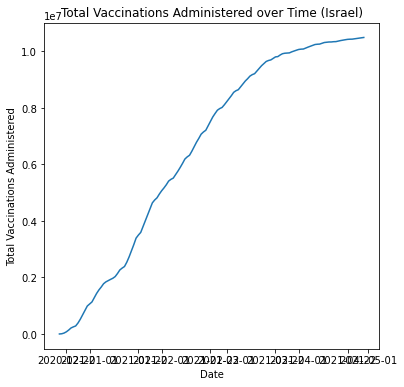

In [50]:
# ISR Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_GLO_ISR.loc[:, 'DateTime'], vax_GLO_ISR.loc[:, 'Doses_admin'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (Israel)')

Text(0.5, 1.0, 'Total Vaccinations Administered over Time (United States v Israel)')

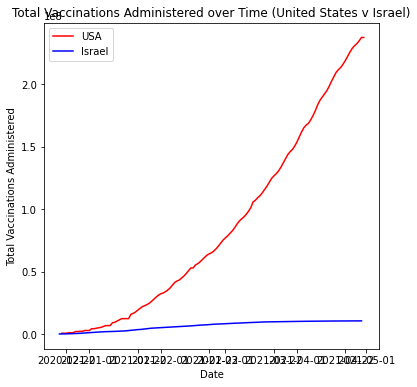

In [51]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_GLO_USA.loc[:, 'DateTime']
y1 = vax_GLO_USA.loc[:, 'Doses_admin']
x2 = vax_GLO_ISR.loc[:, 'DateTime']
y2 = vax_GLO_ISR.loc[:, 'Doses_admin']

plt.plot(x1,y1, c='r', label = 'USA')
plt.plot(x2,y2, c='b', label='Israel')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Administered')
plt.title('Total Vaccinations Administered over Time (United States v Israel)')

Text(0.5, 1.0, 'People Fully Vaccinated over Time (United States v Israel)')

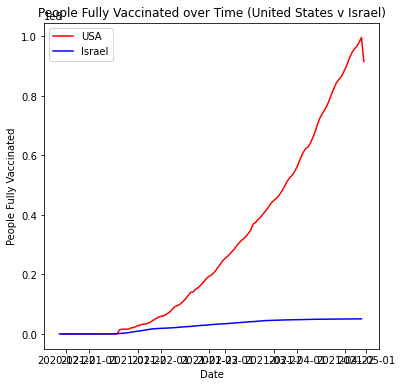

In [52]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_GLO_USA.loc[:, 'DateTime']
y1 = vax_GLO_USA.loc[:, 'People_fully_vaccinated']
x2 = vax_GLO_ISR.loc[:, 'DateTime']
y2 = vax_GLO_ISR.loc[:, 'People_fully_vaccinated']

plt.plot(x1,y1, c='r', label='USA')
plt.plot(x2,y2, c='b', label='Israel')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (United States v Israel)')

In [ ]:
# current data sets we have
# super_cases
    # information on the covid cases per each country (updated daily)
# US_cases
    # information on the covid cases per each state in the USA
# vax_GLO
    # information about the number of vaccines administered and # ppl vacc
# vax_GLO_USA
# vax_USA
# vax_USA_All
# us_political (kinda broken)

# trying data from another source

In [57]:
# Global Cases
vax_ENG2 = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/England.csv')
vax_ENG2 = vax_ENG2.drop('source_url',axis=1)
vax_ENG2

location                   object
date                       object
vaccine                    object
total_vaccinations          int64
people_vaccinated           int64
people_fully_vaccinated     int64
dtype: object

In [64]:
vax_ENG2.loc[:,'date'] = pd.to_datetime(vax_ENG2.loc[:,'date'], format= '%Y-%m-%d')
vax_ENG2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 110 non-null    object        
 1   date                     110 non-null    datetime64[ns]
 2   vaccine                  110 non-null    object        
 3   total_vaccinations       110 non-null    int64         
 4   people_vaccinated        110 non-null    int64         
 5   people_fully_vaccinated  110 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 5.3+ KB


Text(0.5, 1.0, 'People Fully Vaccinated over Time (England)')

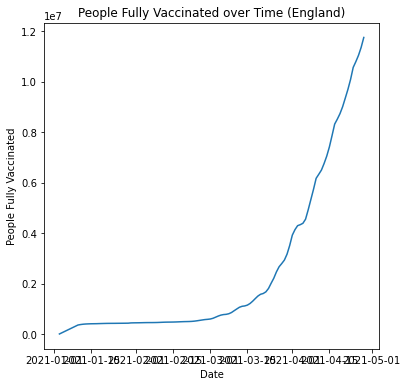

In [65]:
# ISR Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_ENG2.loc[:, 'date'], vax_ENG2.loc[:, 'people_fully_vaccinated'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (England)')

Text(0.5, 1.0, 'People Fully Vaccinated over Time (UK)')

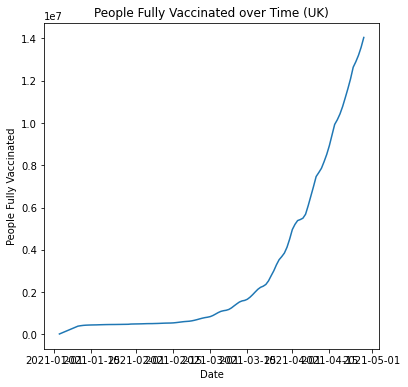

In [86]:
# Global Cases
vax_UK2 = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv')
vax_UK2 = vax_UK2.drop('source_url',axis=1)

vax_UK2.loc[:,'date'] = pd.to_datetime(vax_UK2.loc[:,'date'], format= '%Y-%m-%d')

# ISR Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_UK2.loc[:, 'date'], vax_UK2.loc[:, 'people_fully_vaccinated'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (UK)')

In [66]:
# Global Cases
vax_ISR2 = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/Israel.csv')
vax_ISR2 = vax_ISR2.drop('source_url',axis=1)
vax_ISR2

,location,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Israel,2020-12-19,Pfizer/BioNTech,61,61,NaN
1,Israel,2020-12-20,Pfizer/BioNTech,7436,7436,NaN
2,Israel,2020-12-21,Pfizer/BioNTech,32318,32318,NaN
3,Israel,2020-12-22,Pfizer/BioNTech,76939,76939,NaN
4,Israel,2020-12-23,Pfizer/BioNTech,139777,139777,NaN
...,...,...,...,...,...,...
127,Israel,2021-04-25,"Moderna, Pfizer/BioNTech",10446218,5385408,5060810.0
128,Israel,2021-04-26,"Moderna, Pfizer/BioNTech",10459039,5390559,5068480.0
129,Israel,2021-04-27,"Moderna, Pfizer/BioNTech",10469871,5394885,5074986.0
130,Israel,2021-04-28,"Moderna, Pfizer/BioNTech",10481270,5399157,5082113.0


In [67]:
vax_ISR2.loc[:,'date'] = pd.to_datetime(vax_ISR2.loc[:,'date'], format= '%Y-%m-%d')
vax_ISR2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 132 non-null    object        
 1   date                     132 non-null    datetime64[ns]
 2   vaccine                  132 non-null    object        
 3   total_vaccinations       132 non-null    int64         
 4   people_vaccinated        132 non-null    int64         
 5   people_fully_vaccinated  116 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.3+ KB


Text(0.5, 1.0, 'People Fully Vaccinated over Time (Israel)')

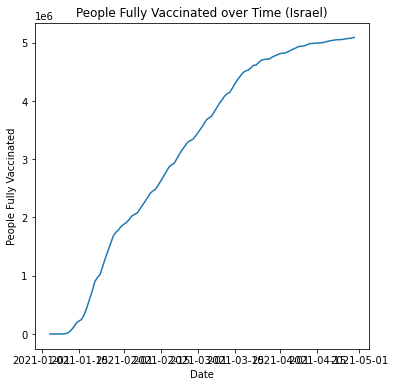

In [68]:
# ISR Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_ISR2.loc[:, 'date'], vax_ISR2.loc[:, 'people_fully_vaccinated'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (Israel)')

Text(0.5, 1.0, 'People Fully Vaccinated over Time (USA)')

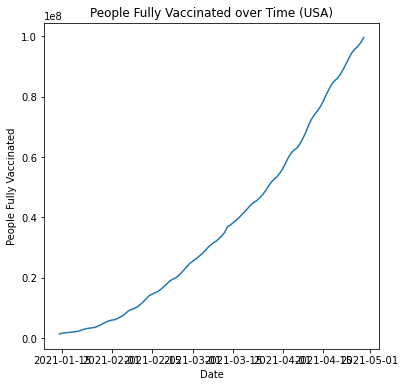

In [69]:
# Global Cases
vax_USA2 = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20States.csv')
vax_USA2 = vax_USA2.drop('source_url',axis=1)
vax_USA2.loc[:,'date'] = pd.to_datetime(vax_USA2.loc[:,'date'], format= '%Y-%m-%d')

# ISR Vaccinations over Time
plt.figure(figsize=(6,6))
plt.plot(vax_USA2.loc[:, 'date'], vax_USA2.loc[:, 'people_fully_vaccinated'])
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (USA)')

Text(0.5, 1.0, 'People Fully Vaccinated over Time (United States v Israel)')

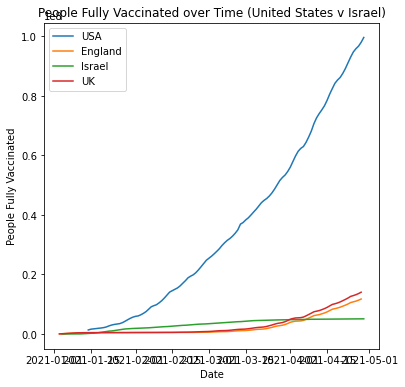

In [87]:
# US Vaccinations over Time
plt.figure(figsize=(6,6))
x1 = vax_USA2.loc[:, 'date']
y1 = vax_USA2.loc[:, 'people_fully_vaccinated']
x2 = vax_ENG2.loc[:, 'date']
y2 = vax_ENG2.loc[:, 'people_fully_vaccinated']
x3 = vax_ISR2.loc[:, 'date']
y3 = vax_ISR2.loc[:, 'people_fully_vaccinated']
x4 = vax_UK2.loc[:, 'date']
y4 = vax_UK2.loc[:, 'people_fully_vaccinated']

plt.plot(x1,y1, label='USA')
plt.plot(x2,y2, label='England')
plt.plot(x3,y3,label='Israel')
plt.plot(x4,y4,label='UK')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (United States v Israel)')

In [73]:
populations = pd.read_csv('WPP2019_TotalPopulationBySex.csv')
populations['Location'].unique()

array(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States', 'Albania',
       'Algeria', 'American Samoa', 'Andean Community', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia',
       'Asia-Pacific Economic Cooperation (APEC)', 'Asia-Pacific Group',
       'Association of Southeast Asian Nations (ASEAN)', 'Australia',
       'Australia/New Zealand', 'Austria', 'Azerbaijan', 'BRIC', 'BRICS',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Belt-Road Initiative (BRI)',
       'Belt-Road Initiative: Africa', 'Belt-Road Initiative: Asia',
       'Belt-Road Initiative: Europe',
       'Belt-Road Initiative: Latin America and the Cari

In [83]:
pop_USA = populations[populations.loc[:,'Location']=='United States of America']
pop_UK = populations[populations.loc[:,'Location']=='United Kingdom']
pop_ISR = populations[populations.loc[:,'Location']=='Israel']
pop_USA.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
264221,840,United States of America,2,Medium,1950,1950.5,79233.218,79571.179,158804.397,17.361
264222,840,United States of America,2,Medium,1951,1951.5,80165.741,80706.523,160872.264,17.587
264223,840,United States of America,2,Medium,1952,1952.5,81281.509,81984.517,163266.026,17.848
264224,840,United States of America,2,Medium,1953,1953.5,82534.378,83375.618,165909.996,18.137
264225,840,United States of America,2,Medium,1954,1954.5,83884.153,84852.237,168736.390,18.446


In [90]:
#population values are hard coded right now, need to be updated so they can change as population data changes
vax_USA2['percent_fully_vaccinated'] = (vax_USA2['people_fully_vaccinated']/331002651)*100
vax_UK2['percent_fully_vaccinated'] = (vax_UK2['people_fully_vaccinated']/67886011)*100
vax_ISR2['percent_fully_vaccinated'] = (vax_ISR2['people_fully_vaccinated']/8655535)*100

Text(0.5, 1.0, 'People Fully Vaccinated over Time (United States v Israel)')

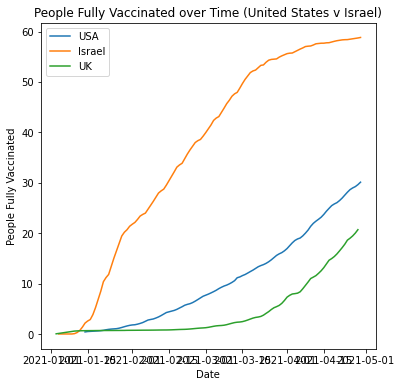

In [91]:
plt.figure(figsize=(6,6))
x1 = vax_USA2.loc[:, 'date']
y1 = vax_USA2.loc[:, 'percent_fully_vaccinated']
# x2 = vax_ENG2.loc[:, 'date']
# y2 = vax_ENG2.loc[:, 'percent_fully_vaccinated']
x3 = vax_ISR2.loc[:, 'date']
y3 = vax_ISR2.loc[:, 'percent_fully_vaccinated']
x4 = vax_UK2.loc[:, 'date']
y4 = vax_UK2.loc[:, 'percent_fully_vaccinated']

plt.plot(x1,y1, label='USA')
# plt.plot(x2,y2, label='England')
plt.plot(x3,y3,label='Israel')
plt.plot(x4,y4,label='UK')
plt.legend()
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated over Time (United States v Israel)')

# looking at population per state to determine the % of population vaccinated

In [110]:
state_pop = pd.read_csv('csvData.csv')
state_pop.drop(['rank','Growth','Pop2018','Pop2010','growthSince2010','Percent','density'], axis=1)

,State,Pop
0,California,39613500
1,Texas,29730300
2,Florida,21944600
3,New York,19300000
4,Pennsylvania,12804100
5,Illinois,12569300
6,Ohio,11714600
7,Georgia,10830000
8,North Carolina,10701000
9,Michigan,9992430


In [102]:
# vax_GLO_USA.head()
vax_USA.head()
# vax_USA_All

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key
0,Alabama,2020-12-10,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
1,Alabama,2020-12-10,Moderna,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
2,Alabama,2020-12-10,Pfizer,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
3,Alabama,2020-12-11,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"
4,Alabama,2020-12-11,Moderna,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US"


In [118]:
a = state_pop.loc[state_pop['State'] == 'California']['Pop']
a

0    39613500
Name: Pop, dtype: int64

In [137]:
for index, row in vax_USA_pop.iterrows():
    if row['Province_State'] in state_pop.loc[:,'State']:
        state = row['Province_State']
        population = state_pop[state_pop['State'] == state, 'Pop']#.iloc[0]
        row['Population'] = population
    else:
        row['Population'] = 0
# vax_USA_pop['Province_State'].nunique()
# state_pop['State'].nunique()

In [138]:
#i KNOW there was a better way to do that.... whooopssss
vax_USA_pop.head()

,Province_State,Date,Vaccine_Type,FIPS,Country_Region,Lat,Long_,Doses_alloc,Doses_shipped,Doses_admin,Stage_One_Doses,Stage_Two_Doses,Combined_Key,Population
0,Alabama,2020-12-10,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",0
1,Alabama,2020-12-10,Moderna,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",0
2,Alabama,2020-12-10,Pfizer,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",0
3,Alabama,2020-12-11,All,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",0
4,Alabama,2020-12-11,Moderna,1.0,US,32.3182,-86.9023,NaN,NaN,NaN,NaN,NaN,"Alabama, US",0


gave up here, couldnt get the population onto the state data to be able to plot the percentage of the population fully vaccinated over time! I KNOW there is a way to do this but damn it i quit